## Training Data

In [208]:
# read data
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols

filename = "/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data/19120_2_00004_spikes_and_times_v2_preprocessed_training.h5"

with h5py.File(filename, 'r') as f:
    print('Available datasets:', list(f.keys()))
    cell_traces = np.array(f['cell_traces'])
    frame_times = np.array(f['frame_times'])
    pupil_radius = np.array(f['pupil_radius'])
    treadmill_velocity = np.array(f['treadmill_velocity'])
    audio_peak_8750 = np.array(f['audio_peak_8750'])
    audio_peak_13700 = np.array(f['audio_peak_13700'])

Available datasets: ['audio_peak_12000', 'audio_peak_13700', 'audio_peak_8750', 'cell_traces', 'frame_times', 'pupil_radius', 'treadmill_velocity']


In [209]:
# make any tone
any_tone = audio_peak_8750 + audio_peak_13700
audio_peak_8750 = np.where(audio_peak_8750 == 1, -1, 0)
either_tone = audio_peak_8750 + audio_peak_13700

In [206]:
audio_peak_13700

array('0', dtype='<U1')

In [138]:
# make index for each dataframe
ind = pd.DataFrame({'index': range(0,len(any_tone))})

In [139]:
# make dataframe of cell_traces
cell_traces_no_lag = pd.DataFrame(cell_traces).transpose()

cell_traces_p05 = pd.DataFrame(cell_traces[:,3:]).transpose()
cell_traces_p1 = pd.DataFrame(cell_traces[:,6:]).transpose()
cell_traces_p15 = pd.DataFrame(cell_traces[:,9:]).transpose()
cell_traces_p2 = pd.DataFrame(cell_traces[:,13:]).transpose()
cell_traces_p25 = pd.DataFrame(cell_traces[:,16:]).transpose()

cell_traces_n05 = pd.DataFrame(cell_traces[:,:-3]).transpose()
cell_traces_n1 = pd.DataFrame(cell_traces[:,:-6]).transpose()
cell_traces_n15 = pd.DataFrame(cell_traces[:,:-9]).transpose()
cell_traces_n2 = pd.DataFrame(cell_traces[:,:-13]).transpose()
cell_traces_n25 = pd.DataFrame(cell_traces[:,:-16]).transpose()

In [142]:
# temporary table with no lag, +- 0.5, +- 1, +-1.5, +-2, +-2.5
no_lag = pd.DataFrame({'audio_peak_13700': audio_peak_13700,
                   'audio_peak_8750': audio_peak_8750,
                      'any_tone': any_tone,
                      'either_tone':either_tone})

p05 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[0:-3],
                   'audio_peak_8750': audio_peak_8750[0:-3],
                   'any_tone': any_tone[0:-3],
                      'either_tone':either_tone[0:-3]})
p1 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[0:-6],
                   'audio_peak_8750': audio_peak_8750[0:-6],
                   'any_tone': any_tone[0:-6],
                      'either_tone':either_tone[0:-6]})
p15 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[0:-9],
                   'audio_peak_8750': audio_peak_8750[0:-9],
                   'any_tone': any_tone[0:-9],
                      'either_tone':either_tone[0:-9]})
p2 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[0:-13],
                   'audio_peak_8750': audio_peak_8750[0:-13],
                   'any_tone': any_tone[0:-13],
                      'either_tone':either_tone[0:-13]})
p25 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[0:-16],
                   'audio_peak_8750': audio_peak_8750[0:-16],
                   'any_tone': any_tone[0:-16],
                      'either_tone':either_tone[0:-16]})

n05 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[3:],
                   'audio_peak_8750': audio_peak_8750[3:],
                   'any_tone': any_tone[3:],
                      'either_tone':either_tone[3:]})
n1 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[6:],
                   'audio_peak_8750': audio_peak_8750[6:],
                   'any_tone': any_tone[6:],
                      'either_tone':either_tone[6:]})
n15 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[9:],
                   'audio_peak_8750': audio_peak_8750[9:],
                   'any_tone': any_tone[9:],
                      'either_tone':either_tone[9:]})
n2 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[13:],
                   'audio_peak_8750': audio_peak_8750[13:],
                   'any_tone': any_tone[13:],
                      'either_tone':either_tone[13:]})
n25 = pd.DataFrame({'audio_peak_13700': audio_peak_13700[16:],
                   'audio_peak_8750': audio_peak_8750[16:],
                   'any_tone': any_tone[16:],
                      'either_tone':either_tone[16:]})

In [143]:
# combine tabels and make them full tabel for 11 lags
data_no_lag = pd.concat([ind, cell_traces_no_lag, no_lag], axis = 1)

data_p05 = pd.concat([ind, cell_traces_p05, p05], axis = 1)
data_p1 = pd.concat([ind, cell_traces_p1, p1], axis = 1)
data_p15 = pd.concat([ind, cell_traces_p15, p15], axis = 1)
data_p2 = pd.concat([ind, cell_traces_p2, p2], axis = 1)
data_p25 = pd.concat([ind, cell_traces_p25, p25], axis = 1)

data_n05 = pd.concat([ind, cell_traces_n05, n05], axis = 1)
data_n1 = pd.concat([ind, cell_traces_n1, n1], axis = 1)
data_n15 = pd.concat([ind, cell_traces_n15, n15], axis = 1)
data_n2 = pd.concat([ind, cell_traces_n2, n2], axis = 1)
data_n25 = pd.concat([ind, cell_traces_n25, n25], axis = 1)

In [144]:
diff_array = np.where(np.diff(frame_times) > 1)[0]

drop_indices_05 = list(range(3))
drop_indices_05.extend(list(range(data_n05.shape[0] - 3, data_n05.shape[0])))
drop_indices_1 = list(range(6))
drop_indices_1.extend(list(range(data_n1.shape[0] - 6, data_n1.shape[0])))
drop_indices_15 = list(range(9))
drop_indices_15.extend(list(range(data_n15.shape[0] - 9, data_n15.shape[0])))
drop_indices_2 = list(range(13))
drop_indices_2.extend(list(range(data_n2.shape[0] - 13, data_n2.shape[0])))
drop_indices_25 = list(range(16))
drop_indices_25.extend(list(range(data_n25.shape[0] - 16, data_n25.shape[0])))

for i in range(len(diff_array)):
    
    drop_indices_05.extend(list(range(diff_array[i] - 3, diff_array[i] + 3)))
    drop_indices_1.extend(list(range(diff_array[i] - 6, diff_array[i] + 6)))
    drop_indices_15.extend(list(range(diff_array[i] - 9, diff_array[i] + 9)))
    drop_indices_2.extend(list(range(diff_array[i] - 13, diff_array[i] + 13)))
    drop_indices_25.extend(list(range(diff_array[i] - 16, diff_array[i] + 16)))

data_p05 = data_p05.drop(data_p05.index[drop_indices_05])
data_p1 = data_p1.drop(data_p1.index[drop_indices_1])
data_p15 = data_p15.drop(data_p15.index[drop_indices_15])
data_p2 = data_p2.drop(data_p2.index[drop_indices_2])
data_p25 = data_p25.drop(data_p25.index[drop_indices_25])    
    
data_n05 = data_n05.drop(data_n05.index[drop_indices_05])
data_n1 = data_n1.drop(data_n1.index[drop_indices_1])
data_n15 = data_n15.drop(data_n15.index[drop_indices_15])
data_n2 = data_n2.drop(data_n2.index[drop_indices_2])
data_n25 = data_n25.drop(data_n25.index[drop_indices_25])

In [152]:
# make linear regression analysis on each cell no lag
pvalue1_no_lag = []
pvalue2_no_lag = []
pvalue3_no_lag = []
pvalue4_no_lag = []
for i in range(data_no_lag.shape[1] - 5):
    celltrace = data_no_lag[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_no_lag).fit()
    lm2 = ols(formula2, data = data_no_lag).fit()
    lm3 = ols(formula3, data = data_no_lag).fit()
    lm4 = ols(formula4, data = data_no_lag).fit()
    pvalue1_no_lag.append((lm1.f_pvalue, i, 0))
    pvalue2_no_lag.append((lm2.f_pvalue, i, 0))
    pvalue3_no_lag.append((lm3.f_pvalue, i, 0))
    pvalue4_no_lag.append((lm4.f_pvalue, i, 0))

In [153]:
# make linear regression analysis on each cell 0.5s lag
pvalue1_p05 = []
pvalue2_p05 = []
pvalue3_p05 = []
pvalue4_p05 = []
for i in range(data_p05.shape[1] - 5):
    celltrace = data_p05[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_p05).fit()
    lm2 = ols(formula2, data = data_p05).fit()
    lm3 = ols(formula3, data = data_p05).fit()
    lm4 = ols(formula4, data = data_p05).fit()
    pvalue1_p05.append((lm1.f_pvalue, i, 0.5))
    pvalue2_p05.append((lm2.f_pvalue, i, 0.5))
    pvalue3_p05.append((lm3.f_pvalue, i, 0.5))
    pvalue4_p05.append((lm4.f_pvalue, i, 0.5))

In [154]:
# make linear regression analysis on each cell 1s lag
pvalue1_p1 = []
pvalue2_p1 = []
pvalue3_p1 = []
pvalue4_p1 = []
for i in range(data_p1.shape[1] - 5):
    celltrace = data_p1[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_p1).fit()
    lm2 = ols(formula2, data = data_p1).fit()
    lm3 = ols(formula3, data = data_p1).fit()
    lm4 = ols(formula4, data = data_p1).fit()
    pvalue1_p1.append((lm1.f_pvalue, i, 1))
    pvalue2_p1.append((lm2.f_pvalue, i, 1))
    pvalue3_p1.append((lm3.f_pvalue, i, 1))
    pvalue4_p1.append((lm4.f_pvalue, i, 1))

In [155]:
# make linear regression analysis on each cell 1.5s lag
pvalue1_p15 = []
pvalue2_p15 = []
pvalue3_p15 = []
pvalue4_p15 = []
for i in range(data_p15.shape[1] - 5):
    celltrace = data_p15[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_p15).fit()
    lm2 = ols(formula2, data = data_p15).fit()
    lm3 = ols(formula3, data = data_p15).fit()
    lm4 = ols(formula4, data = data_p15).fit()
    pvalue1_p15.append((lm1.f_pvalue, i, 1.5))
    pvalue2_p15.append((lm2.f_pvalue, i, 1.5))
    pvalue3_p15.append((lm3.f_pvalue, i, 1.5))
    pvalue4_p15.append((lm4.f_pvalue, i, 1.5))

In [156]:
# make linear regression analysis on each cell 2s lag
pvalue1_p2 = []
pvalue2_p2 = []
pvalue3_p2 = []
pvalue4_p2 = []
for i in range(data_p2.shape[1] - 5):
    celltrace = data_p2[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_p2).fit()
    lm2 = ols(formula2, data = data_p2).fit()
    lm3 = ols(formula3, data = data_p2).fit()
    lm4 = ols(formula4, data = data_p2).fit()
    pvalue1_p2.append((lm1.f_pvalue, i, 2))
    pvalue2_p2.append((lm2.f_pvalue, i, 2))
    pvalue3_p2.append((lm3.f_pvalue, i, 2))
    pvalue4_p2.append((lm4.f_pvalue, i, 2))

In [157]:
# make linear regression analysis on each cell 2.5s lag
pvalue1_p25 = []
pvalue2_p25 = []
pvalue3_p25 = []
pvalue4_p25 = []
for i in range(data_p25.shape[1] - 5):
    celltrace = data_p25[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_p25).fit()
    lm2 = ols(formula2, data = data_p25).fit()
    lm3 = ols(formula3, data = data_p25).fit()
    lm4 = ols(formula4, data = data_p25).fit()
    pvalue1_p25.append((lm1.f_pvalue, i, 2.5))
    pvalue2_p25.append((lm2.f_pvalue, i, 2.5))
    pvalue3_p25.append((lm3.f_pvalue, i, 2.5))
    pvalue4_p25.append((lm4.f_pvalue, i, 2.5))

In [158]:
# make linear regression analysis on each cell -0.5s lag
pvalue1_n05 = []
pvalue2_n05 = []
pvalue3_n05 = []
pvalue4_n05 = []
for i in range(data_n05.shape[1] - 5):
    celltrace = data_n05[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_n05).fit()
    lm2 = ols(formula2, data = data_n05).fit()
    lm3 = ols(formula3, data = data_n05).fit()
    lm4 = ols(formula4, data = data_n05).fit()
    pvalue1_n05.append((lm1.f_pvalue, i, -0.5))
    pvalue2_n05.append((lm2.f_pvalue, i, -0.5))
    pvalue3_n05.append((lm3.f_pvalue, i, -0.5))
    pvalue4_n05.append((lm4.f_pvalue, i, -0.5))

In [159]:
# make linear regression analysis on each cell -1s lag
pvalue1_n1 = []
pvalue2_n1 = []
pvalue3_n1 = []
pvalue4_n1 = []
for i in range(data_n1.shape[1] - 5):
    celltrace = data_n1[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_n1).fit()
    lm2 = ols(formula2, data = data_n1).fit()
    lm3 = ols(formula3, data = data_n1).fit()
    lm4 = ols(formula4, data = data_n1).fit()
    pvalue1_n1.append((lm1.f_pvalue, i, -1))
    pvalue2_n1.append((lm2.f_pvalue, i, -1))
    pvalue3_n1.append((lm3.f_pvalue, i, -1))
    pvalue4_n1.append((lm4.f_pvalue, i, -1))

In [160]:
# make linear regression analysis on each cell -1.5s lag
pvalue1_n15 = []
pvalue2_n15 = []
pvalue3_n15 = []
pvalue4_n15 = []
for i in range(data_n15.shape[1] - 5):
    celltrace = data_n15[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_n15).fit()
    lm2 = ols(formula2, data = data_n15).fit()
    lm3 = ols(formula3, data = data_n15).fit()
    lm4 = ols(formula4, data = data_n15).fit()
    pvalue1_n15.append((lm1.f_pvalue, i, -1.5))
    pvalue2_n15.append((lm2.f_pvalue, i, -1.5))
    pvalue3_n15.append((lm3.f_pvalue, i, -1.5))
    pvalue4_n15.append((lm4.f_pvalue, i, -1.5))

In [161]:
# make linear regression analysis on each cell -2s lag
pvalue1_n2 = []
pvalue2_n2 = []
pvalue3_n2 = []
pvalue4_n2 = []
for i in range(data_n2.shape[1] - 5):
    celltrace = data_n2[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_n2).fit()
    lm2 = ols(formula2, data = data_n2).fit()
    lm3 = ols(formula3, data = data_n2).fit()
    lm4 = ols(formula4, data = data_n2).fit()
    pvalue1_n2.append((lm1.f_pvalue, i, -2))
    pvalue2_n2.append((lm2.f_pvalue, i, -2))
    pvalue3_n2.append((lm3.f_pvalue, i, -2))
    pvalue4_n2.append((lm4.f_pvalue, i, -2))

In [162]:
# make linear regression analysis on each cell -2.5s lag
pvalue1_n25 = []
pvalue2_n25 = []
pvalue3_n25 = []
pvalue4_n25 = []
for i in range(data_n25.shape[1] - 5):
    celltrace = data_n25[i]
    formula1 = 'celltrace ~ audio_peak_13700'
    formula2 = 'celltrace ~ audio_peak_8750'
    formula3 = 'celltrace ~ any_tone'
    formula4 = 'celltrace ~ either_tone'
    lm1 = ols(formula1, data = data_n25).fit()
    lm2 = ols(formula2, data = data_n25).fit()
    lm3 = ols(formula3, data = data_n25).fit()
    lm4 = ols(formula4, data = data_n25).fit()
    pvalue1_n25.append((lm1.f_pvalue, i, -2.5))
    pvalue2_n25.append((lm2.f_pvalue, i, -2.5))
    pvalue3_n25.append((lm3.f_pvalue, i, -2.5))
    pvalue4_n25.append((lm4.f_pvalue, i, -2.5))

In [163]:
# combine all the pvalues together by different tone 
pvalue1 = pvalue1_no_lag + pvalue1_p05 + pvalue1_p1 + pvalue1_p15 + pvalue1_p2 + pvalue1_p25 + pvalue1_n05 + pvalue1_n1 + pvalue1_n15 + pvalue1_n2 + pvalue1_n25
pvalue2 = pvalue2_no_lag + pvalue2_p05 + pvalue2_p1 + pvalue2_p15 + pvalue2_p2 + pvalue2_p25 + pvalue2_n05 + pvalue2_n1 + pvalue2_n15 + pvalue2_n2 + pvalue2_n25
pvalue3 = pvalue3_no_lag + pvalue3_p05 + pvalue3_p1 + pvalue3_p15 + pvalue3_p2 + pvalue3_p25 + pvalue3_n05 + pvalue3_n1 + pvalue3_n15 + pvalue3_n2 + pvalue3_n25
pvalue4 = pvalue4_no_lag + pvalue4_p05 + pvalue4_p1 + pvalue4_p15 + pvalue4_p2 + pvalue4_p25 + pvalue4_n05 + pvalue4_n1 + pvalue4_n15 + pvalue4_n2 + pvalue4_n25

In [164]:
# use cell number as key to sort
def takeSecond(elem):
    return elem[1]
pvalue1.sort(key = takeSecond)
pvalue2.sort(key = takeSecond)
pvalue3.sort(key = takeSecond)
pvalue4.sort(key = takeSecond)

In [165]:
# group by cell number, and get minimum pvalue from each group
p_value1 = [pvalue1[i:i+11] for i in range(0, len(pvalue1),11)]
p_value1_final = [min(p_value1[i]) for i in range(0, len(p_value1),1)]
p_value2 = [pvalue2[i:i+11] for i in range(0, len(pvalue2),11)]
p_value2_final = [min(p_value2[i]) for i in range(0, len(p_value2),1)]
p_value3 = [pvalue3[i:i+11] for i in range(0, len(pvalue3),11)]
p_value3_final = [min(p_value3[i]) for i in range(0, len(p_value3),1)]
p_value4 = [pvalue4[i:i+11] for i in range(0, len(pvalue4),11)]
p_value4_final = [min(p_value4[i]) for i in range(0, len(p_value4),1)]

In [166]:
# sort final p-value table by pvalue
p_value1_final.sort()
p_value2_final.sort()
p_value3_final.sort()
p_value4_final.sort()

In [167]:
p_df = pd.DataFrame({'tone_13700': p_value1_final,
                     'tone_8750': p_value2_final,
                     'any_tone': p_value3_final,
                    'either_tone': p_value4_final})

In [168]:
p_value1_filtered = []
for i in range(len(p_value1_final)):
    if p_value1_final[i][0] <= 0.000001:
        p_value1_filtered.append(p_value1_final[i])
p_value1_filtered.sort()

p_value2_filtered = []
for i in range(len(p_value2_final)):
    if p_value2_final[i][0] <= 0.000001:
        p_value2_filtered.append(p_value2_final[i])
p_value2_filtered.sort()

p_value3_filtered = []
for i in range(len(p_value3_final)):
    if p_value3_final[i][0] <= 0.000001:
        p_value3_filtered.append(p_value3_final[i])
p_value3_filtered.sort()

p_value4_filtered = []
for i in range(len(p_value4_final)):
    if p_value4_final[i][0] <= 0.000001:
        p_value4_filtered.append(p_value4_final[i])
p_value4_filtered.sort()

In [169]:
cell_13700 = p_value1_filtered
cell_8750 = p_value2_filtered
cell_anytone = p_value3_filtered
cell_eithertone = p_value4_filtered

In [170]:
cell_anytone_filtered = []
for i in range(len(cell_anytone)):
    cell_anytone_filtered.append((cell_anytone[i][1], cell_anytone[i][2]))
cell_13700_filtered = []
for i in range(len(cell_13700)):
    cell_13700_filtered.append((cell_13700[i][1], cell_13700[i][2]))
cell_8750_filtered = []
for i in range(len(cell_8750)):
    cell_8750_filtered.append((cell_8750[i][1], cell_8750[i][2]))
cell_eithertone_filtered = []
for i in range(len(cell_eithertone)):
    cell_eithertone_filtered.append((cell_eithertone[i][1], cell_eithertone[i][2]))

In [171]:
len(cell_anytone_filtered)

52

In [172]:
len(cell_13700_filtered)

150

In [173]:
len(cell_8750_filtered)

160

In [174]:
len(cell_eithertone_filtered)

51

In [175]:
list_of_data = [new_no_lag, new_p05, new_p1, new_p15, new_p2, new_p25, new_n05, new_n1, new_n15, new_n2, new_n25]

In [176]:
new_no_lag = pd.DataFrame({'index': data_no_lag['index']})
new_p05 = pd.DataFrame({'index': data_p05['index']})
new_p1 = pd.DataFrame({'index': data_p1['index']})
new_p15 = pd.DataFrame({'index': data_p15['index']})
new_p2 = pd.DataFrame({'index': data_p2['index']})
new_p25 = pd.DataFrame({'index': data_p25['index']})
new_n05 = pd.DataFrame({'index': data_n05['index']})
new_n1 = pd.DataFrame({'index': data_n1['index']})
new_n15 = pd.DataFrame({'index': data_n15['index']})
new_n2 = pd.DataFrame({'index': data_n2['index']})
new_n25 = pd.DataFrame({'index': data_n25['index']})
for i in cell_anytone_filtered:
    if i[1] == 0:
        new_no_lag = pd.concat([new_no_lag, pd.DataFrame({i[0]: data_no_lag[i[0]]})], axis = 1)
    if i[1] == 0.5:
        new_p05 = pd.concat([new_p05, pd.DataFrame({i[0]: data_p05[i[0]]})], axis = 1)
    if i[1] == 1:
        new_p1 = pd.concat([new_p1, pd.DataFrame({i[0]: data_p1[i[0]]})], axis = 1)
    if i[1] == 1.5:
        new_p15 = pd.concat([new_p15, pd.DataFrame({i[0]: data_p15[i[0]]})], axis = 1)
    if i[1] == 2:
        new_p2 = pd.concat([new_p2, pd.DataFrame({i[0]: data_p2[i[0]]})], axis = 1)
    if i[1] == 2.5:
        new_p25 = pd.concat([new_p25, pd.DataFrame({i[0]: data_p25[i[0]]})], axis = 1)
    if i[1] == -0.5:
        new_n05 = pd.concat([new_n05, pd.DataFrame({i[0]: data_n05[i[0]]})], axis = 1)
    if i[1] == -1:
        new_n1 = pd.concat([new_n1, pd.DataFrame({i[0]: data_n1[i[0]]})], axis = 1)
    if i[1] == -1.5:
        new_n15 = pd.concat([new_n15, pd.DataFrame({i[0]: data_n15[i[0]]})], axis = 1)
    if i[1] == -2:
        new_n2 = pd.concat([new_n2, pd.DataFrame({i[0]: data_n2[i[0]]})], axis = 1)
    if i[1] == -2.5:
        new_n25 = pd.concat([new_n25, pd.DataFrame({i[0]: data_n25[i[0]]})], axis = 1)

In [177]:
data_train_anytone = pd.DataFrame({'index': data_no_lag['index'],
                            'any_tone': any_tone,
                           'audio_peak_13700': audio_peak_13700,
                           'audio_peak_8750': audio_peak_8750,
                          'time': frame_times})

for i in list_of_data:
    data_train_anytone  = pd.merge(data_train_anytone, i, on = 'index')

In [178]:
data_train_anytone.to_csv('/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data_train_anytone_new.csv')

In [179]:
new_no_lag = pd.DataFrame({'index': data_no_lag['index']})
new_p05 = pd.DataFrame({'index': data_p05['index']})
new_p1 = pd.DataFrame({'index': data_p1['index']})
new_p15 = pd.DataFrame({'index': data_p15['index']})
new_p2 = pd.DataFrame({'index': data_p2['index']})
new_p25 = pd.DataFrame({'index': data_p25['index']})
new_n05 = pd.DataFrame({'index': data_n05['index']})
new_n1 = pd.DataFrame({'index': data_n1['index']})
new_n15 = pd.DataFrame({'index': data_n15['index']})
new_n2 = pd.DataFrame({'index': data_n2['index']})
new_n25 = pd.DataFrame({'index': data_n25['index']})
for i in cell_eithertone_filtered:
    if i[1] == 0:
        new_no_lag = pd.concat([new_no_lag, pd.DataFrame({i[0]: data_no_lag[i[0]]})], axis = 1)
    if i[1] == 0.5:
        new_p05 = pd.concat([new_p05, pd.DataFrame({i[0]: data_p05[i[0]]})], axis = 1)
    if i[1] == 1:
        new_p1 = pd.concat([new_p1, pd.DataFrame({i[0]: data_p1[i[0]]})], axis = 1)
    if i[1] == 1.5:
        new_p15 = pd.concat([new_p15, pd.DataFrame({i[0]: data_p15[i[0]]})], axis = 1)
    if i[1] == 2:
        new_p2 = pd.concat([new_p2, pd.DataFrame({i[0]: data_p2[i[0]]})], axis = 1)
    if i[1] == 2.5:
        new_p25 = pd.concat([new_p25, pd.DataFrame({i[0]: data_p25[i[0]]})], axis = 1)
    if i[1] == -0.5:
        new_n05 = pd.concat([new_n05, pd.DataFrame({i[0]: data_n05[i[0]]})], axis = 1)
    if i[1] == -1:
        new_n1 = pd.concat([new_n1, pd.DataFrame({i[0]: data_n1[i[0]]})], axis = 1)
    if i[1] == -1.5:
        new_n15 = pd.concat([new_n15, pd.DataFrame({i[0]: data_n15[i[0]]})], axis = 1)
    if i[1] == -2:
        new_n2 = pd.concat([new_n2, pd.DataFrame({i[0]: data_n2[i[0]]})], axis = 1)
    if i[1] == -2.5:
        new_n25 = pd.concat([new_n25, pd.DataFrame({i[0]: data_n25[i[0]]})], axis = 1)

In [180]:
data_train_eithertone = pd.DataFrame({'index': data_no_lag['index'],
                            'either_tone': either_tone,
                           'audio_peak_13700': audio_peak_13700,
                           'audio_peak_8750': audio_peak_8750,
                          'time': frame_times})

for i in list_of_data:
    data_train_eithertone  = pd.merge(data_train_eithertone, i, on = 'index')

In [181]:
data_train_eithertone.to_csv('/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data_train_eithertone_new.csv')

## Testing Data

In [192]:
# prediction
# read testing data
filename = "/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data/19120_2_00004_spikes_and_times_v2_preprocessed_testing.h5"

with h5py.File(filename, 'r') as f:
    print('Available datasets:', list(f.keys()))
    cell_traces = np.array(f['cell_traces'])
    frame_times = np.array(f['frame_times'])
    pupil_radius = np.array(f['pupil_radius'])
    treadmill_velocity = np.array(f['treadmill_velocity'])
    audio_peak_8750 = np.array(f['audio_peak_8750'])
    audio_peak_13700 = np.array(f['audio_peak_13700'])

Available datasets: ['audio_peak_12000', 'audio_peak_13700', 'audio_peak_8750', 'cell_traces', 'frame_times', 'pupil_radius', 'treadmill_velocity']


In [193]:
# make dataframe for testing data
any_tone = audio_peak_8750 + audio_peak_13700
audio_peak_8750 = np.where(audio_peak_8750 == 1, -1, 0)
either_tone = audio_peak_8750 + audio_peak_13700
ind = pd.DataFrame({'index': range(0,len(any_tone))})

cell_traces_no_lag = pd.DataFrame(cell_traces).transpose()

cell_traces_p05 = pd.DataFrame(cell_traces[:,3:]).transpose()
cell_traces_p1 = pd.DataFrame(cell_traces[:,6:]).transpose()
cell_traces_p15 = pd.DataFrame(cell_traces[:,9:]).transpose()
cell_traces_p2 = pd.DataFrame(cell_traces[:,13:]).transpose()
cell_traces_p25 = pd.DataFrame(cell_traces[:,16:]).transpose()

cell_traces_n05 = pd.DataFrame(cell_traces[:,:-3]).transpose()
cell_traces_n1 = pd.DataFrame(cell_traces[:,:-6]).transpose()
cell_traces_n15 = pd.DataFrame(cell_traces[:,:-9]).transpose()
cell_traces_n2 = pd.DataFrame(cell_traces[:,:-13]).transpose()
cell_traces_n25 = pd.DataFrame(cell_traces[:,:-16]).transpose()

no_lag = pd.DataFrame({'any_tone': any_tone,
                      'either_tone':either_tone})

p05 = pd.DataFrame({'any_tone': any_tone[0:-3],
                      'either_tone':either_tone[0:-3]})
p1 = pd.DataFrame({'any_tone': any_tone[0:-6],
                      'either_tone':either_tone[0:-6]})
p15 = pd.DataFrame({'any_tone': any_tone[0:-9],
                      'either_tone':either_tone[0:-9]})
p2 = pd.DataFrame({'any_tone': any_tone[0:-13],
                      'either_tone':either_tone[0:-13]})
p25 = pd.DataFrame({'any_tone': any_tone[0:-16],
                      'either_tone':either_tone[0:-16]})

n05 = pd.DataFrame({'any_tone': any_tone[3:],
                      'either_tone':either_tone[3:]})
n1 = pd.DataFrame({'any_tone': any_tone[6:],
                      'either_tone':either_tone[6:]})
n15 = pd.DataFrame({'any_tone': any_tone[9:],
                      'either_tone':either_tone[9:]})
n2 = pd.DataFrame({'any_tone': any_tone[13:],
                      'either_tone':either_tone[13:]})
n25 = pd.DataFrame({'any_tone': any_tone[16:],
                      'either_tone':either_tone[16:]})

data_no_lag = pd.concat([ind, cell_traces_no_lag, no_lag], axis = 1)

data_p05 = pd.concat([ind, cell_traces_p05, p05], axis = 1)
data_p1 = pd.concat([ind, cell_traces_p1, p1], axis = 1)
data_p15 = pd.concat([ind, cell_traces_p15, p15], axis = 1)
data_p2 = pd.concat([ind, cell_traces_p2, p2], axis = 1)
data_p25 = pd.concat([ind, cell_traces_p25, p25], axis = 1)

data_n05 = pd.concat([ind, cell_traces_n05, n05], axis = 1)
data_n1 = pd.concat([ind, cell_traces_n1, n1], axis = 1)
data_n15 = pd.concat([ind, cell_traces_n15, n15], axis = 1)
data_n2 = pd.concat([ind, cell_traces_n2, n2], axis = 1)
data_n25 = pd.concat([ind, cell_traces_n25, n25], axis = 1)

diff_array = np.where(np.diff(frame_times) > 1)[0]

drop_indices_05 = list(range(3))
drop_indices_05.extend(list(range(data_n05.shape[0] - 3, data_n05.shape[0])))
drop_indices_1 = list(range(6))
drop_indices_1.extend(list(range(data_n1.shape[0] - 6, data_n1.shape[0])))
drop_indices_15 = list(range(9))
drop_indices_15.extend(list(range(data_n15.shape[0] - 9, data_n15.shape[0])))
drop_indices_2 = list(range(13))
drop_indices_2.extend(list(range(data_n2.shape[0] - 13, data_n2.shape[0])))
drop_indices_25 = list(range(16))
drop_indices_25.extend(list(range(data_n25.shape[0] - 16, data_n25.shape[0])))

for i in range(len(diff_array)):
    
    drop_indices_05.extend(list(range(diff_array[i] - 3, diff_array[i] + 3)))
    drop_indices_1.extend(list(range(diff_array[i] - 6, diff_array[i] + 6)))
    drop_indices_15.extend(list(range(diff_array[i] - 9, diff_array[i] + 9)))
    drop_indices_2.extend(list(range(diff_array[i] - 13, diff_array[i] + 13)))
    drop_indices_25.extend(list(range(diff_array[i] - 16, diff_array[i] + 16)))

data_p05 = data_p05.drop(data_p05.index[drop_indices_05])
data_p1 = data_p1.drop(data_p1.index[drop_indices_1])
data_p15 = data_p15.drop(data_p15.index[drop_indices_15])
data_p2 = data_p2.drop(data_p2.index[drop_indices_2])
data_p25 = data_p25.drop(data_p25.index[drop_indices_25])    
    
data_n05 = data_n05.drop(data_n05.index[drop_indices_05])
data_n1 = data_n1.drop(data_n1.index[drop_indices_1])
data_n15 = data_n15.drop(data_n15.index[drop_indices_15])
data_n2 = data_n2.drop(data_n2.index[drop_indices_2])
data_n25 = data_n25.drop(data_n25.index[drop_indices_25])

In [194]:
new_no_lag = pd.DataFrame({'index': data_no_lag['index']})
new_p05 = pd.DataFrame({'index': data_p05['index']})
new_p1 = pd.DataFrame({'index': data_p1['index']})
new_p15 = pd.DataFrame({'index': data_p15['index']})
new_p2 = pd.DataFrame({'index': data_p2['index']})
new_p25 = pd.DataFrame({'index': data_p25['index']})
new_n05 = pd.DataFrame({'index': data_n05['index']})
new_n1 = pd.DataFrame({'index': data_n1['index']})
new_n15 = pd.DataFrame({'index': data_n15['index']})
new_n2 = pd.DataFrame({'index': data_n2['index']})
new_n25 = pd.DataFrame({'index': data_n25['index']})
for i in cell_anytone_filtered:
    if i[1] == 0:
        new_no_lag = pd.concat([new_no_lag, pd.DataFrame({i[0]: data_no_lag[i[0]]})], axis = 1)
    if i[1] == 0.5:
        new_p05 = pd.concat([new_p05, pd.DataFrame({i[0]: data_p05[i[0]]})], axis = 1)
    if i[1] == 1:
        new_p1 = pd.concat([new_p1, pd.DataFrame({i[0]: data_p1[i[0]]})], axis = 1)
    if i[1] == 1.5:
        new_p15 = pd.concat([new_p15, pd.DataFrame({i[0]: data_p15[i[0]]})], axis = 1)
    if i[1] == 2:
        new_p2 = pd.concat([new_p2, pd.DataFrame({i[0]: data_p2[i[0]]})], axis = 1)
    if i[1] == 2.5:
        new_p25 = pd.concat([new_p25, pd.DataFrame({i[0]: data_p25[i[0]]})], axis = 1)
    if i[1] == -0.5:
        new_n05 = pd.concat([new_n05, pd.DataFrame({i[0]: data_n05[i[0]]})], axis = 1)
    if i[1] == -1:
        new_n1 = pd.concat([new_n1, pd.DataFrame({i[0]: data_n1[i[0]]})], axis = 1)
    if i[1] == -1.5:
        new_n15 = pd.concat([new_n15, pd.DataFrame({i[0]: data_n15[i[0]]})], axis = 1)
    if i[1] == -2:
        new_n2 = pd.concat([new_n2, pd.DataFrame({i[0]: data_n2[i[0]]})], axis = 1)
    if i[1] == -2.5:
        new_n25 = pd.concat([new_n25, pd.DataFrame({i[0]: data_n25[i[0]]})], axis = 1)

In [195]:
data_test_anytone = pd.DataFrame({'index': data_no_lag['index'],
                            'any_tone': any_tone,
                           'audio_peak_13700': audio_peak_13700,
                           'audio_peak_8750': audio_peak_8750,
                          'time': frame_times})
for i in list_of_data:
    data_test_anytone = pd.merge(data_test_anytone, i, on = 'index')

In [196]:
data_test_anytone.to_csv('/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data_test_anytone_new.csv')

In [197]:
new_no_lag = pd.DataFrame({'index': data_no_lag['index']})
new_p05 = pd.DataFrame({'index': data_p05['index']})
new_p1 = pd.DataFrame({'index': data_p1['index']})
new_p15 = pd.DataFrame({'index': data_p15['index']})
new_p2 = pd.DataFrame({'index': data_p2['index']})
new_p25 = pd.DataFrame({'index': data_p25['index']})
new_n05 = pd.DataFrame({'index': data_n05['index']})
new_n1 = pd.DataFrame({'index': data_n1['index']})
new_n15 = pd.DataFrame({'index': data_n15['index']})
new_n2 = pd.DataFrame({'index': data_n2['index']})
new_n25 = pd.DataFrame({'index': data_n25['index']})
for i in cell_eithertone_filtered:
    if i[1] == 0:
        new_no_lag = pd.concat([new_no_lag, pd.DataFrame({i[0]: data_no_lag[i[0]]})], axis = 1)
    if i[1] == 0.5:
        new_p05 = pd.concat([new_p05, pd.DataFrame({i[0]: data_p05[i[0]]})], axis = 1)
    if i[1] == 1:
        new_p1 = pd.concat([new_p1, pd.DataFrame({i[0]: data_p1[i[0]]})], axis = 1)
    if i[1] == 1.5:
        new_p15 = pd.concat([new_p15, pd.DataFrame({i[0]: data_p15[i[0]]})], axis = 1)
    if i[1] == 2:
        new_p2 = pd.concat([new_p2, pd.DataFrame({i[0]: data_p2[i[0]]})], axis = 1)
    if i[1] == 2.5:
        new_p25 = pd.concat([new_p25, pd.DataFrame({i[0]: data_p25[i[0]]})], axis = 1)
    if i[1] == -0.5:
        new_n05 = pd.concat([new_n05, pd.DataFrame({i[0]: data_n05[i[0]]})], axis = 1)
    if i[1] == -1:
        new_n1 = pd.concat([new_n1, pd.DataFrame({i[0]: data_n1[i[0]]})], axis = 1)
    if i[1] == -1.5:
        new_n15 = pd.concat([new_n15, pd.DataFrame({i[0]: data_n15[i[0]]})], axis = 1)
    if i[1] == -2:
        new_n2 = pd.concat([new_n2, pd.DataFrame({i[0]: data_n2[i[0]]})], axis = 1)
    if i[1] == -2.5:
        new_n25 = pd.concat([new_n25, pd.DataFrame({i[0]: data_n25[i[0]]})], axis = 1)

In [198]:
data_test_eithertone = pd.DataFrame({'index': data_no_lag['index'],
                            'either_tone': either_tone,
                           'audio_peak_13700': audio_peak_13700,
                           'audio_peak_8750': audio_peak_8750,
                          'time': frame_times})
for i in list_of_data:
    data_test_eithertone = pd.merge(data_test_eithertone, i, on = 'index')

In [199]:
data_test_eithertone.to_csv('/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data_test_eithertone_new.csv')

In [124]:
data_test

,any_tone,audio_peak_13700,audio_peak_8750,index,pupil_radius,time,treadmill_velocity,4930,2924,4929,...,3400,4323,4632,3646,4195,2607,3131,5630,3512,1135
0,0,0,0,16,163.869119,2.540568,-0.135907,-1.225078e-01,-0.258137,3.159393e-02,...,2.518391e-01,8.906077e-02,-8.349758e-01,-6.343901e-01,-5.559839e-01,-1.354003e-01,-5.850268e-02,6.201482e-02,-1.855153e-01,1.361107e+00
1,0,0,0,17,162.523083,2.699353,-0.134103,-1.458044e-01,-0.428338,-1.544248e-02,...,3.464657e-01,3.490181e-01,-8.067236e-01,-7.252479e-01,-5.983332e-01,-3.856837e-01,-1.707875e-02,7.464392e-01,-3.355642e-02,1.777614e+00
2,0,0,0,18,162.382394,2.858139,-0.159593,2.252790e-01,-0.490543,3.124062e-01,...,1.830033e+00,5.897638e-01,-7.944151e-01,-8.174142e-01,-6.273928e-01,-5.969494e-01,-6.999495e-02,8.064085e-01,-1.213453e-01,3.784420e+00
3,0,0,0,19,162.459234,3.016924,-0.076564,3.985942e-01,-0.418441,6.799507e-01,...,4.537321e+00,-1.173416e-01,-7.695519e-01,-8.353697e-01,-6.979075e-01,-6.387392e-01,-3.865885e-02,-3.741559e-02,-1.494960e-01,5.894951e+00
4,0,0,0,20,162.639548,3.175710,-0.039898,1.400342e-01,-0.409808,9.060850e-01,...,6.462876e+07,-1.285120e-01,-7.294019e-01,-8.384880e-01,-7.365271e-01,-6.004776e-01,-5.965500e-02,1.260624e-01,-1.412149e-01,1.765208e+08
5,0,0,0,21,162.859224,3.334495,-0.011638,-2.464299e-01,-0.415693,1.514890e+00,...,1.626659e+08,-1.261203e-01,-6.540365e-01,-7.952364e-01,-7.046712e-01,-6.315747e-01,2.358933e-01,2.913173e-01,-3.035885e-01,1.449625e+08
6,0,0,0,22,162.557838,3.493281,-0.011947,-4.556160e-01,-0.383390,1.697832e+00,...,1.011464e+08,2.385348e-01,-5.364742e-01,-7.478499e-01,-6.169912e-01,-5.299969e-01,7.878909e-01,7.406250e+06,-4.917827e-01,2.979133e+07
7,0,0,0,23,162.402869,3.652066,-0.039898,-3.257504e-01,-0.363581,1.593266e+00,...,5.401761e+00,5.715583e-01,-3.931450e-01,-7.390599e-01,-5.047221e-01,-1.238737e-01,8.316896e+07,1.391314e+08,-5.964270e-01,3.122250e+00
8,0,0,0,24,162.276779,3.810851,0.000000,-2.557236e-01,-0.402122,5.430216e-01,...,5.377614e+00,4.188044e-01,-3.955052e-01,-6.928688e-01,-2.553827e-01,3.844518e-02,1.014895e+08,9.146794e-01,-6.075593e-01,2.909447e+00
9,0,0,0,25,161.859776,3.969637,0.000000,-2.936653e-01,-0.467835,1.622826e-01,...,8.418108e+07,-7.603501e-02,-3.875251e-01,-5.897345e-01,4.552400e-02,-2.864311e-01,6.148273e+02,-3.517012e-01,-6.579564e-01,4.568340e+00


## entire data

In [71]:
filename = "/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data/19120_2_00004_spikes_and_times_v2_preprocessed.h5"

with h5py.File(filename, 'r') as f:
    print('Available datasets:', list(f.keys()))
    cell_traces = np.array(f['cell_traces'])
    frame_times = np.array(f['frame_times'])
    pupil_radius = np.array(f['pupil_radius'])
    treadmill_velocity = np.array(f['treadmill_velocity'])
    audio_peak_8750 = np.array(f['audio_peak_8750'])
    audio_peak_13700 = np.array(f['audio_peak_13700'])

Available datasets: ['audio_peak_12000', 'audio_peak_13700', 'audio_peak_8750', 'cell_traces', 'cell_xyz', 'frame_times', 'pupil_radius', 'pupil_xy', 'treadmill_velocity']


In [80]:
audio_peak_8750 = np.where(audio_peak_8750 == 1, -1, 0)
any_tone = audio_peak_8750 + audio_peak_13700
ind = pd.DataFrame({'index': range(0,len(any_tone)),
                   'frame_times': frame_times,
                    'audio_peak_13700': audio_peak_13700,
                    'audio_peak_8750': audio_peak_8750,
                   'any_tone': any_tone})

In [81]:
ind.to_csv('/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/ind.csv')

In [65]:
# make dataframe for entire data
audio_peak_8750 = np.where(audio_peak_8750 == 1, -1, 0)
any_tone = audio_peak_8750 + audio_peak_13700
ind = pd.DataFrame({'index': range(0,len(any_tone))})

cell_traces_no_lag = pd.DataFrame(cell_traces).transpose()

cell_traces_p05 = pd.DataFrame(cell_traces[:,3:]).transpose()
cell_traces_p1 = pd.DataFrame(cell_traces[:,6:]).transpose()
cell_traces_p15 = pd.DataFrame(cell_traces[:,9:]).transpose()
cell_traces_p2 = pd.DataFrame(cell_traces[:,13:]).transpose()
cell_traces_p25 = pd.DataFrame(cell_traces[:,16:]).transpose()

cell_traces_n05 = pd.DataFrame(cell_traces[:,:-3]).transpose()
cell_traces_n1 = pd.DataFrame(cell_traces[:,:-6]).transpose()
cell_traces_n15 = pd.DataFrame(cell_traces[:,:-9]).transpose()
cell_traces_n2 = pd.DataFrame(cell_traces[:,:-13]).transpose()
cell_traces_n25 = pd.DataFrame(cell_traces[:,:-16]).transpose()

no_lag = pd.DataFrame({'any_tone': any_tone})

p05 = pd.DataFrame({'any_tone': any_tone[0:-3]})
p1 = pd.DataFrame({'any_tone': any_tone[0:-6]})
p15 = pd.DataFrame({'any_tone': any_tone[0:-9]})
p2 = pd.DataFrame({'any_tone': any_tone[0:-13]})
p25 = pd.DataFrame({'any_tone': any_tone[0:-16]})

n05 = pd.DataFrame({'any_tone': any_tone[3:]})
n1 = pd.DataFrame({'any_tone': any_tone[6:]})
n15 = pd.DataFrame({'any_tone': any_tone[9:]})
n2 = pd.DataFrame({'any_tone': any_tone[13:]})
n25 = pd.DataFrame({'any_tone': any_tone[16:]})

data_no_lag = pd.concat([ind, cell_traces_no_lag, no_lag], axis = 1)

data_p05 = pd.concat([ind, cell_traces_p05, p05], axis = 1)
data_p1 = pd.concat([ind, cell_traces_p1, p1], axis = 1)
data_p15 = pd.concat([ind, cell_traces_p15, p15], axis = 1)
data_p2 = pd.concat([ind, cell_traces_p2, p2], axis = 1)
data_p25 = pd.concat([ind, cell_traces_p25, p25], axis = 1)

data_n05 = pd.concat([ind, cell_traces_n05, n05], axis = 1)
data_n1 = pd.concat([ind, cell_traces_n1, n1], axis = 1)
data_n15 = pd.concat([ind, cell_traces_n15, n15], axis = 1)
data_n2 = pd.concat([ind, cell_traces_n2, n2], axis = 1)
data_n25 = pd.concat([ind, cell_traces_n25, n25], axis = 1)

diff_array = np.where(np.diff(frame_times) > 1)[0]

drop_indices_05 = list(range(3))
drop_indices_05.extend(list(range(data_n05.shape[0] - 3, data_n05.shape[0])))
drop_indices_1 = list(range(6))
drop_indices_1.extend(list(range(data_n1.shape[0] - 6, data_n1.shape[0])))
drop_indices_15 = list(range(9))
drop_indices_15.extend(list(range(data_n15.shape[0] - 9, data_n15.shape[0])))
drop_indices_2 = list(range(13))
drop_indices_2.extend(list(range(data_n2.shape[0] - 13, data_n2.shape[0])))
drop_indices_25 = list(range(16))
drop_indices_25.extend(list(range(data_n25.shape[0] - 16, data_n25.shape[0])))

for i in range(len(diff_array)):
    
    drop_indices_05.extend(list(range(diff_array[i] - 3, diff_array[i] + 3)))
    drop_indices_1.extend(list(range(diff_array[i] - 6, diff_array[i] + 6)))
    drop_indices_15.extend(list(range(diff_array[i] - 9, diff_array[i] + 9)))
    drop_indices_2.extend(list(range(diff_array[i] - 13, diff_array[i] + 13)))
    drop_indices_25.extend(list(range(diff_array[i] - 16, diff_array[i] + 16)))

data_p05 = data_p05.drop(data_p05.index[drop_indices_05])
data_p1 = data_p1.drop(data_p1.index[drop_indices_1])
data_p15 = data_p15.drop(data_p15.index[drop_indices_15])
data_p2 = data_p2.drop(data_p2.index[drop_indices_2])
data_p25 = data_p25.drop(data_p25.index[drop_indices_25])    
    
data_n05 = data_n05.drop(data_n05.index[drop_indices_05])
data_n1 = data_n1.drop(data_n1.index[drop_indices_1])
data_n15 = data_n15.drop(data_n15.index[drop_indices_15])
data_n2 = data_n2.drop(data_n2.index[drop_indices_2])
data_n25 = data_n25.drop(data_n25.index[drop_indices_25])

In [66]:
new_no_lag = pd.DataFrame({'index': data_no_lag['index']})
new_p05 = pd.DataFrame({'index': data_p05['index']})
new_p1 = pd.DataFrame({'index': data_p1['index']})
new_p15 = pd.DataFrame({'index': data_p15['index']})
new_p2 = pd.DataFrame({'index': data_p2['index']})
new_p25 = pd.DataFrame({'index': data_p25['index']})
new_n05 = pd.DataFrame({'index': data_n05['index']})
new_n1 = pd.DataFrame({'index': data_n1['index']})
new_n15 = pd.DataFrame({'index': data_n15['index']})
new_n2 = pd.DataFrame({'index': data_n2['index']})
new_n25 = pd.DataFrame({'index': data_n25['index']})
for i in cell_anytone_filtered:
    if i[1] == 0:
        new_no_lag = pd.concat([new_no_lag, pd.DataFrame({i[0]: data_no_lag[i[0]]})], axis = 1)
    if i[1] == 0.5:
        new_p05 = pd.concat([new_p05, pd.DataFrame({i[0]: data_p05[i[0]]})], axis = 1)
    if i[1] == 1:
        new_p1 = pd.concat([new_p1, pd.DataFrame({i[0]: data_p1[i[0]]})], axis = 1)
    if i[1] == 1.5:
        new_p15 = pd.concat([new_p15, pd.DataFrame({i[0]: data_p15[i[0]]})], axis = 1)
    if i[1] == 2:
        new_p2 = pd.concat([new_p2, pd.DataFrame({i[0]: data_p2[i[0]]})], axis = 1)
    if i[1] == 2.5:
        new_p25 = pd.concat([new_p25, pd.DataFrame({i[0]: data_p25[i[0]]})], axis = 1)
    if i[1] == -0.5:
        new_n05 = pd.concat([new_n05, pd.DataFrame({i[0]: data_n05[i[0]]})], axis = 1)
    if i[1] == -1:
        new_n1 = pd.concat([new_n1, pd.DataFrame({i[0]: data_n1[i[0]]})], axis = 1)
    if i[1] == -1.5:
        new_n15 = pd.concat([new_n15, pd.DataFrame({i[0]: data_n15[i[0]]})], axis = 1)
    if i[1] == -2:
        new_n2 = pd.concat([new_n2, pd.DataFrame({i[0]: data_n2[i[0]]})], axis = 1)
    if i[1] == -2.5:
        new_n25 = pd.concat([new_n25, pd.DataFrame({i[0]: data_n25[i[0]]})], axis = 1)

In [67]:
data_entire = pd.DataFrame({'index': data_no_lag['index'],
                            'any_tone': any_tone,
                           'audio_peak_13700': audio_peak_13700,
                           'audio_peak_8750': audio_peak_8750,
                          'time': frame_times})
for i in list_of_data:
    data_test  = pd.merge(data_test, i, on = 'index')

In [68]:
data_entire.to_csv('/Users/aaron/Desktop/Rice University/MSTAT/Fall 2018/STAT 535/project/data_entire_new.csv')

In [70]:
sum(audio_peak_13700)

632

## Random Forest

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [55]:
# split data and train
X = data_train.iloc[:,3:]
y = data_train.iloc[:,0]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = RandomForestRegressor(n_estimators = 1, criterion = 'mse', random_state = 0)
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)

scores_rf = cross_val_score(regressor, X, y, cv = 5, scoring = 'accuracy')
predicted_rf = cross_val_predict(regressor, iX, y, cv = 5)

In [ ]:
print(predicted_rf)

In [ ]:
print(scores_rf)

In [345]:
# see train result
accuracy_score(y_test, predicted_rf)

0.9029304029304029

In [359]:
y_pred = regressor.predict(data_test.iloc[:,3:])

In [360]:
accuracy_score(data_test.iloc[:,0], y_pred)

0.8995197635759143

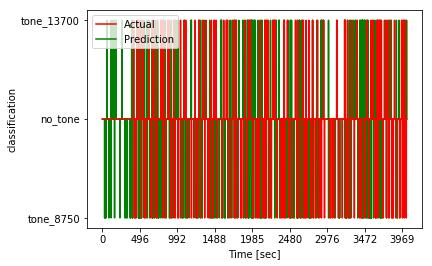

In [361]:
# fig = plt.figure(num=1, figsize=(20, 10),dpi=80)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
p1, = plt.plot(y_pred, color='green')
p2, = plt.plot(data_test.iloc[:,0], color='red')
plt.yticks([-1, 0, 1])
y_ticks = ['tone_8750', 'no_tone', 'tone_13700']
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(y_ticks)
x_ticks = ['0', '496', '992', '1488', '1985', '2480', '2976', '3472', '3969']
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
ax.set_xticklabels(x_ticks)
l = plt.legend([p2, p1], ["Actual", "Prediction"])
plt.ylabel('classification')
plt.xlabel('Time [sec]')
plt.show()

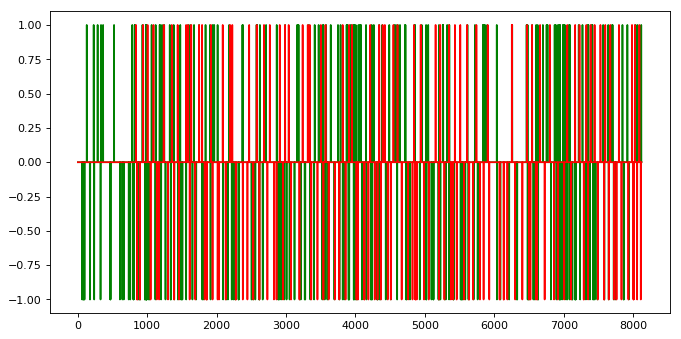

In [362]:
fig = plt.figure(num=1, figsize=(10, 5),dpi=80)
plt.plot(y_pred, color='green')
plt.plot(data_test.iloc[:,0], color='red')


## Extreme Gradient Boosting

## SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
scores_svm = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')

In [ ]:
print(scores_svm)

## Gaussian Process

## Multilayer Perceptron Network

## Bayesian Ridge

## PCA

## Decision tree

## LDA

## Logistic regression

## Boosted Classification Trees